In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# DATA EXPLORATION

small dataset

In [6]:
beer_file = r'../data/beers.csv'
breweries_file = r'../data/breweries.csv'
small = True


**big_dataset**

In [2]:
beer_file = r'../data/bigData/beers.csv'
breweries_file = r'../data/bigData/breweries.csv'
small = False

In [3]:
reviews = pd.read_csv (r"../data/bigData/reviews.csv")

In [4]:
print(reviews.columns)
print(reviews.shape)

Index(['beer_id', 'username', 'date', 'text', 'look', 'smell', 'taste', 'feel',
       'overall', 'score'],
      dtype='object')
(9073128, 10)


---
## Load Data

In [5]:
beers = pd.read_csv (beer_file)
if small:
    beers.drop(['Unnamed: 0'], axis=1,inplace=True)
    (drop )

In [6]:
breweries = pd.read_csv (breweries_file)
if small:
    breweries.rename(columns={'Unnamed: 0':'brewery_id'},inplace=True)
else:
    breweries.rename(columns={'id':'brewery_id'},inplace=True)

In [7]:
print(beers.columns)
print(beers.shape)

Index(['id', 'name', 'brewery_id', 'state', 'country', 'style', 'availability',
       'abv', 'notes', 'retired'],
      dtype='object')
(358873, 10)


In [8]:
print(breweries.columns)
print(breweries.shape)

Index(['brewery_id', 'name', 'city', 'state', 'country', 'notes', 'types'], dtype='object')
(50347, 7)


### Join Breweries and beer

In [66]:
beer_and_breweries = pd.merge(beers,breweries,on="brewery_id")
beer_and_breweries.rename(columns={'name_x':'beerName','name_y':'brewName'},inplace=True)

---
### Preview

In [9]:
beers.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


In [10]:
breweries.head()

,brewery_id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


In [11]:
reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [12]:
gb = reviews.dropna().groupby("beer_id")

In [13]:
mean = gb.mean()
median = gb.median()

In [14]:
count = gb.count()

In [15]:
print("score max ",mean["score"].max())
print("score max ",median["score"].max())
print("taste max ",mean["taste"].max())
print("taste max ", median["taste"].max())

score max  5.0
score max  5.0
taste max  5.0
taste max  5.0


In [16]:
print(count.columns)
print(count.nlargest(10,"username"))
count.nsmallest(10,"username")

Index(['username', 'date', 'text', 'look', 'smell', 'taste', 'feel', 'overall',
       'score'],
      dtype='object')
         username  date  text  look  smell  taste  feel  overall  score
beer_id                                                                
11757        7414  7414  7414  7414   7414   7414  7414     7414   7414
19960        7041  7041  7041  7041   7041   7041  7041     7041   7041
7971         6920  6920  6920  6920   6920   6920  6920     6920   6920
16814        6883  6883  6883  6883   6883   6883  6883     6883   6883
1093         6611  6611  6611  6611   6611   6611  6611     6611   6611
17112        6599  6599  6599  6599   6599   6599  6599     6599   6599
29619        6251  6251  6251  6251   6251   6251  6251     6251   6251
2093         6209  6209  6209  6209   6209   6209  6209     6209   6209
10672        6065  6065  6065  6065   6065   6065  6065     6065   6065
412          5689  5689  5689  5689   5689   5689  5689     5689   5689


,username,date,text,look,smell,taste,feel,overall,score
beer_id,,,,,,,,,
165,1,1,1,1,1,1,1,1,1
168,1,1,1,1,1,1,1,1,1
316,1,1,1,1,1,1,1,1,1
1051,1,1,1,1,1,1,1,1,1
1057,1,1,1,1,1,1,1,1,1
1078,1,1,1,1,1,1,1,1,1
1437,1,1,1,1,1,1,1,1,1
1805,1,1,1,1,1,1,1,1,1
1843,1,1,1,1,1,1,1,1,1


In [18]:
reviews[reviews['beer_id']==165]

,beer_id,username,date,text,look,smell,taste,feel,overall,score
1192576,165,Rando23,2012-07-22,,NaN,NaN,NaN,NaN,NaN,4.0
1192577,165,macrosmatic,2012-04-10,,NaN,NaN,NaN,NaN,NaN,3.0
1192883,165,Jason,2000-04-05,Presentation: 12oz brown with no freshness ...,3.5,3.5,3.0,3.5,3.0,3.2


In [23]:
(beers["retired"]=='t').sum()

118393

---
### Some analysis

In [ ]:
if small:
    ibus = beers["ibu"].dropna()
    print(ibus.shape)

In [80]:
bins= np.linspace(0,140,15)

[ 58. 280. 275. 187. 137. 102. 153.  78.  61.  48.  11.  11.   2.   2.]
1405.0


(array([ 40., 216., 304., 199., 155.,  81., 149., 105.,  70.,  37.,  31.,
         11.,   4.,   3.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140.]),
 <a list of 14 Patch objects>)

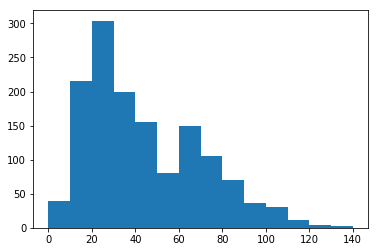

In [86]:
plt.hist(ibus,bins)

--- ---
## Result

|..|count|
|:--------------:|:----:|
| beers |  2410 |
|       breweries      |   558 |
|       ibu data      |  1405 |